[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]]


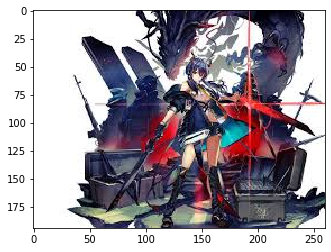

In [46]:
#图像编码处理
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('test.png','rb').read()

with tf.Session() as sess:
    #对图像进行jpeg格式的解码从而得到图像对应的三维矩阵
    #img_data = tf.image.decode_jpeg(image_raw_data)
    #png格式使用以下代码
    img_data = tf.image.decode_png(image_raw_data)
    
    #解码之后的结果为一个张量
    print(img_data.eval())
    
    #可视化
    plt.imshow(img_data.eval())

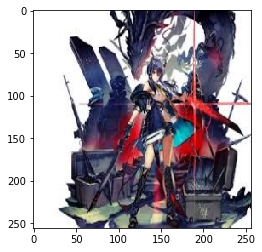

In [28]:
#图像缩放
with tf.Session() as sess:
    #使用双线性插值法将图像缩放为指定尺寸,method = 0,method = 1为最近邻插值法，method = 2 为双立方插值法，method = 3为像素区域插值法
    resize = tf.image.resize_images(img_data,[256,256],method=0)
    #TensorFlow的函数处理图片后储存的数据是float32格式的，需要转换成unit8才能正确打印图片
    resize = np.asarray(resize.eval(),dtype='uint8')
    plt.imshow(resize)

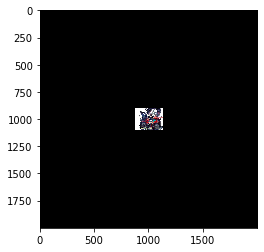

In [29]:
#对图像进行裁剪和填充
#当目标吃春小于原始图像的尺寸，则在中心位置裁剪，反之用黑色像素填充

with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    padded = tf.image.resize_image_with_crop_or_pad(img_data,2000,2000)
    plt.imshow(padded.eval())

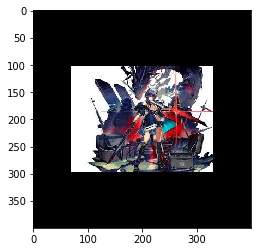

In [30]:
with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(img_data,400,400)
    plt.imshow(croped.eval())

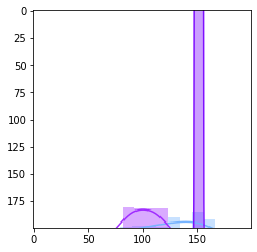

In [45]:
#随机裁剪
with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    random_croped = tf.random_crop(img_data,[200,200,3])
    plt.imshow(random_croped.eval())

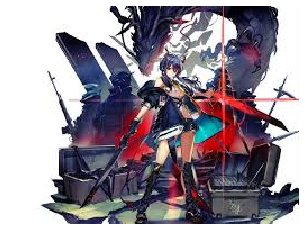

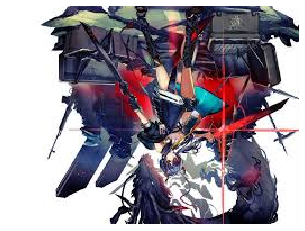

In [34]:
#水平翻转,上下翻转
with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    #flip_left_right = tf.image.flip_left_right(img_data)
    flip_up_down = tf.image.flip_up_down(img_data)
    #plt.imshow(flip_left_right.eval())
    plt.imshow(flip_up_down.eval())
    plt.axis('off')
    plt.show()

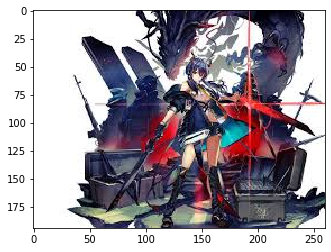

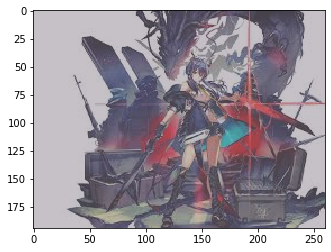

In [35]:
#改变对比度
with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    #将图像对比度降低为原来的二分之一
    contrast = tf.image.adjust_contrast(img_data,0.5)
    #将图像对比度提高到原来的5倍
    #contrast = tf.image.adjust_contrast(img_data,5)
    #在[lower,upper]范围随机调整对比度
    #contrast = tf.image.random_contrast(img_data,lower = 0.2,upper = 3)
    
    plt.imshow(contrast.eval())
    plt.show()

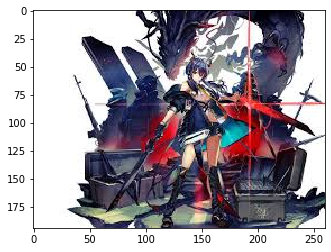

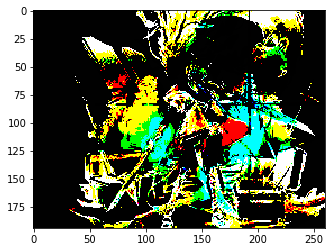

In [48]:
#白化处理,将图像的亮度均值变为0方差变为1
with tf.Session() as sess:
    img_data = tf.image.decode_png(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    standardization = tf.image.per_image_standardization(img_data)
    plt.imshow(np.asarray(standardization.eval(),dtype = 'uint8'))